In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats
import math
import json

## #1
 Построчно​ ​ считать​ ​ *.jsonl​ ​ файл,​ ​ вывести​ ​ все​ ​ типы​ ​ событий,​ ​ подсчитать
количество​ ​ их​ ​ вхождений​ ​ и ​ ​ сохранить​ ​ в ​ ​ файл​ ​ types.json​ .

In [3]:
data = pd.read_json("match-data.jsonl",lines=True)

In [4]:
data.type.unique()

array(['DOTA_COMBATLOG_GAME_STATE', 'player_slot', 'interval', 'cursor',
       'camera', 'CHAT_MESSAGE_DISCONNECT', 'CHAT_MESSAGE_RECONNECT',
       'actions', 'CHAT_MESSAGE_ITEM_PURCHASE', 'courier_spawned',
       'DOTA_COMBATLOG_MODIFIER_ADD', 'DOTA_COMBATLOG_GOLD',
       'name_to_slot', 'DOTA_COMBATLOG_PURCHASE', 'DOTA_COMBATLOG_ITEM',
       'DOTA_COMBATLOG_MODIFIER_REMOVE', 'pings', 'obs',
       'DOTA_COMBATLOG_PLAYERSTATS', 'DOTA_COMBATLOG_DAMAGE',
       'DOTA_COMBATLOG_ABILITY', 'CHAT_MESSAGE_RUNE_PICKUP',
       'DOTA_COMBATLOG_XP', 'DOTA_COMBATLOG_DEATH', 'sen',
       'CHAT_MESSAGE_HERO_KILL', 'CHAT_MESSAGE_FIRSTBLOOD',
       'DOTA_COMBATLOG_FIRST_BLOOD', 'DOTA_COMBATLOG_HEAL',
       'DOTA_COMBATLOG_ABILITY_TRIGGER', 'CHAT_MESSAGE_RUNE_BOTTLE',
       'sen_left', 'obs_left', 'CHAT_MESSAGE_GLYPH_USED',
       'CHAT_MESSAGE_TOWER_KILL', 'DOTA_COMBATLOG_TEAM_BUILDING_KILL',
       'CHAT_MESSAGE_SCAN_USED', 'CHAT_MESSAGE_STREAK_KILL',
       'DOTA_COMBATLOG_KILLSTREAK', 'C

In [5]:
data.type.value_counts().to_json("types.json")

## #2
События​ ​ типа​ ​ “cursor”​ ​ фиксируют​ ​ положение​ ​ курсора​ ​ на​ ​ экране​ ​ игрока.​ ​ Игрок
идентифицируется​ ​ полем​ ​ slot.​ ​ В ​ ​ любом​ ​ матче​ ​ игрок​ ​ располагается​ ​ на​ ​ одном​ ​
из
10​ ​
доступных​ ​ слотов,​ ​ соответственно​ ​ его​ ​ slot​ ​ ∈ [ 0, 9] .​ ​ Все​ ​ остальные​ ​ значения
данного​ ​ поля​ ​ идентифицируют​ ​ комментаторов​ ​ и ​ ​ обсерверов​ ​ матча.​ ​ Для
каждого​ ​ игрока​ ​ необходимо​ ​ нарисовать​ ​ heatmap​ ​ положений​ ​ его​ ​ курсора​ ​ в
течение​ ​ всего​ ​ матча.​ ​ Результат​ ​ сохранить​ ​ в ​ ​ файлы​ ​ heatmap_slot_name.png .

In [6]:
data.slot.dropna().shape[0]/data.shape[0]

0.9513314049793342

Оставим только данные для $slot \in [0,9]$

In [7]:
slot_data = data.dropna(subset=["slot"])
slot_data = slot_data[slot_data.slot.apply(lambda x: x in range(10))]

Сгруппируем данные по полю $slot$

In [8]:
grouped_data = slot_data.groupby(by="slot")

In [9]:
def create_hexbin_image(slot_number,heatmap_data,title=""):
    fig, ax = plt.subplots()
    hex_ax = ax.hexbin(x=heatmap_data['x'], y=heatmap_data['y'],
                       gridsize=25, cmap="jet")
    ax.set_title(title)
    fig.colorbar(hex_ax)
    #В примере ось х инвертирована
    plt.gca().invert_xaxis()
    plt.savefig("heatmap_{0}.png".format(slot_number))

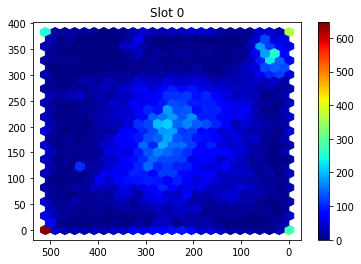

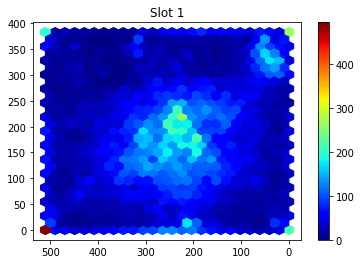

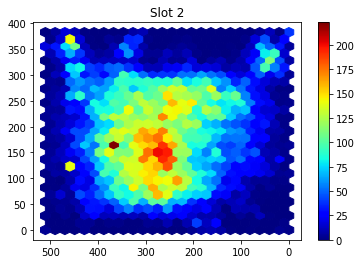

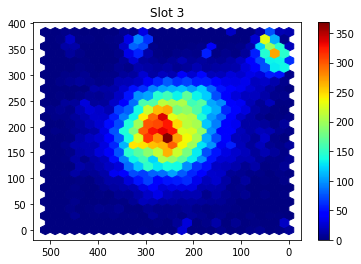

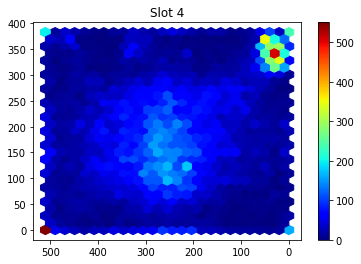

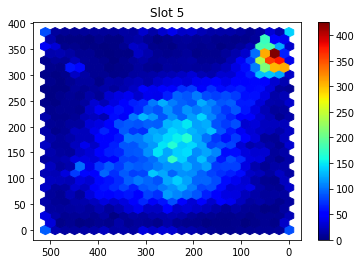

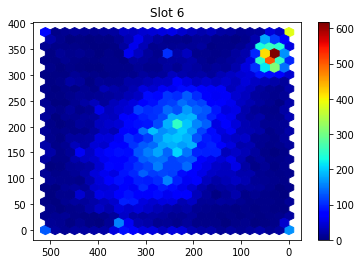

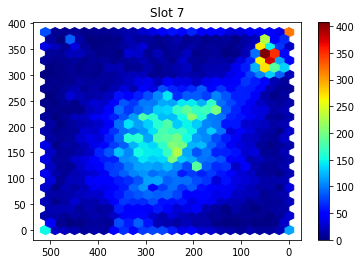

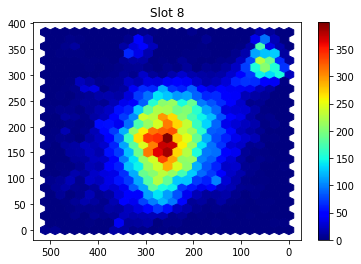

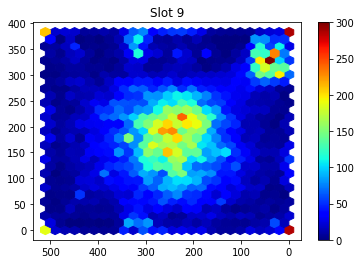

In [10]:
for i in range(10):
    user_data = grouped_data.get_group(i)
    heatmap_data = user_data[user_data.type == "cursor"][["x","y"]]
    create_hexbin_image(i,heatmap_data,title="Slot {}".format(i))

## #3
Портал​ ​ https://www.opendota.com/​​ ​ предоставляет​ ​ доступ​ ​ к ​ ​ базе​ ​ данных​ ​ с
анализами​ ​ профессиональных​ ​ матчей​ ​ Dota​ ​ 2.​ ​ Необходимо​ ​ составить
SQL-запросы​ ​ к ​ ​ базе​ ​ данных​ ​ для​ ​ выгрузки​ ​ 1000​ ​ профессиональных​ ​ матчей​ ​ за
последний​ ​ патч​ ​ 7.07​ ​ с ​ ​ https://www.opendota.com/explorer​ , ​ ​ а ​ ​ также​ ​ 1000
последних​ ​ матчей​ ​ из​ ​ прошлого​ ​ патча​ ​ 7.06.​ ​ Среди​ ​ всех​ ​ матчей​ ​ выбрать​ ​ те,​ ​ в
которых​ ​ есть​ ​ герой​ ​ Anti-Mage​ ​ (hero_id​ ​ = ​ ​ 1).​ ​ Для​ ​ данного​ ​ героя​ ​ нужно​ ​ вывести
значение​ ​ времени​ ​ покупки​ ​ предмета​ ​ battle​ ​ fury​ ​ (‘bfury’​ ​ в ​ ​ purchase_log)​ ​ от​ ​ начала
матча.​ ​ Далее​ ​ необходимо​ ​ провести​ ​ статистический​ ​ тест​ ​ для​ ​ проверки​ ​ гипотезы
о​ ​ том,​ ​ что​ ​ в ​ ​ среднем​ ​ время​ ​
покупки​ ​ предмета​ ​ для​ ​ обоих​ ​ патчей​ ​ одинаково.
API:​ ​ https://docs.opendota.com/
Схема​ ​ БД:​ ​ https://github.com/odota/core/blob/master/sql/create_tables.sql

In [12]:
import requests

def parse_response(response):
    rows = pd.read_json(response.content.decode("utf-8"),lines=True)["rows"][0]
    result = pd.DataFrame(rows)
    return result

def read_sql_from_file(filename):
    with open(filename) as file:
        sql = file.read().replace('\n',' ')
    return sql

response = requests.get('https://api.opendota.com/api/explorer',params={"sql":read_sql_from_file("select_antimage_7_07_patch.sql")})
print(response)
last_patch_data = parse_response(response)
response = requests.get('https://api.opendota.com/api/explorer',params={"sql":read_sql_from_file("select.sql")})
print(response)
prev_patch_data = parse_response(response)

<Response [200]>
<Response [200]>


In [13]:
last_patch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 3 columns):
match_id        132 non-null int64
patch           132 non-null object
purchase_log    131 non-null object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [14]:
prev_patch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
match_id        333 non-null int64
patch           333 non-null object
purchase_log    327 non-null object
dtypes: int64(1), object(2)
memory usage: 7.9+ KB


In [15]:
def extract_bfury_logs(log):
    if not (log is None):
        bfury_logs = list(filter(lambda x: "bfury" == x["key"],log))
        if(len(bfury_logs)<1):
            return None
        return bfury_logs[0]["time"]
    else:
        return None

In [16]:
last_patch_data["bfury_log"] = last_patch_data.purchase_log.apply(extract_bfury_logs)
prev_patch_data["bfury_log"] = prev_patch_data.purchase_log.apply(extract_bfury_logs)
last_patch_data.dropna(inplace=True)
prev_patch_data.dropna(inplace=True)

In [18]:
prev_patch_data.bfury_log.describe()

count     321.000000
mean      968.685358
std       128.383498
min       664.000000
25%       875.000000
50%       967.000000
75%      1041.000000
max      1413.000000
Name: bfury_log, dtype: float64

In [19]:
last_patch_data.bfury_log.describe()

count     127.000000
mean      857.598425
std       124.647392
min       587.000000
25%       754.000000
50%       852.000000
75%       933.000000
max      1297.000000
Name: bfury_log, dtype: float64

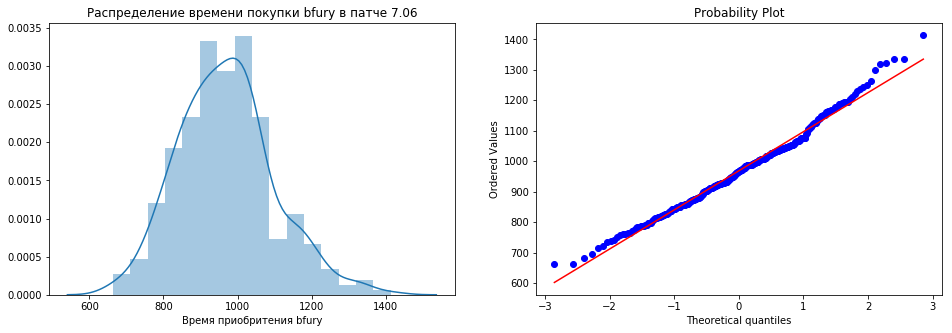

In [52]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
ax = sns.distplot(prev_patch_data.bfury_log,ax=axes[0])
ax.set_title("Распределение времени покупки bfury в патче 7.06")
ax.set_xlabel("Время приобритения bfury")
ax.plot()
qqplot = stats.probplot(prev_patch_data.bfury_log, dist="norm", plot=axes[1])

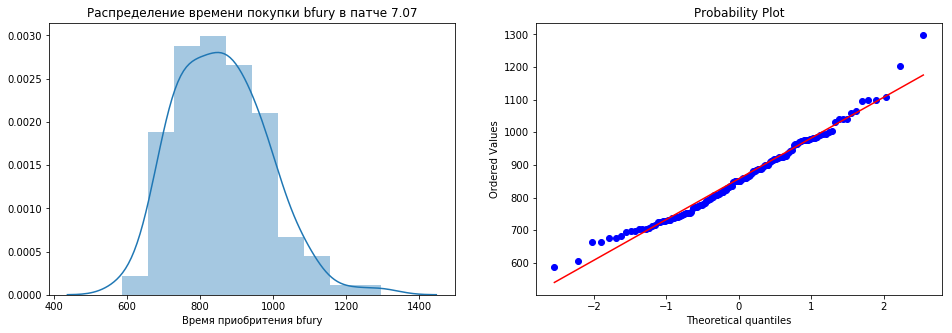

In [53]:
fig,axes = plt.subplots(1,2,figsize=(16,5))
ax = sns.distplot(last_patch_data.bfury_log,ax=axes[0])
ax.set_title("Распределение времени покупки bfury в патче 7.07")
ax.set_xlabel("Время приобритения bfury")
ax.plot()
qqplot = stats.probplot(last_patch_data.bfury_log, dist="norm", plot=axes[1])

[]

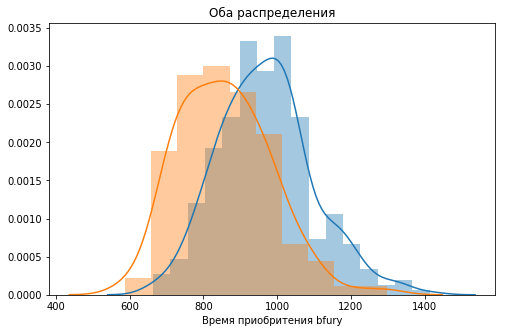

In [54]:
fig,ax = plt.subplots(figsize=(8,5))
sns.distplot(prev_patch_data.bfury_log,ax=ax)
sns.distplot(last_patch_data.bfury_log,ax=ax)
ax.set_title("Оба распределения")
ax.set_xlabel("Время приобритения bfury")
ax.plot()

**Гипотеза: распределения времени покупки bfury является нормальным. Уровень значимости 0.05 **  
Проверим с помощью критерия Шапиро-Уилка

In [23]:
from scipy.stats import shapiro

shapiro(prev_patch_data.bfury_log)

(0.9871982932090759, 0.006135671399533749)

In [24]:
shapiro(last_patch_data.bfury_log)

(0.9794225692749023, 0.050184376537799835)

** Нет оснований отклонить гипотезу о соответствии данных нормальному распределению(для обоих патчей) ** 

 **Гипотеза: распределения имеют одинаковую дисперсию. Уровень значимости 0.05**  
 Проверим с помощью F test

In [25]:
F_stat = prev_patch_data.bfury_log.var()/last_patch_data.bfury_log.var()

df1 = prev_patch_data.bfury_log.shape[0] - 1 
df2 = last_patch_data.bfury_log.shape[0] - 1 
p_value = stats.f.cdf(F_stat,df1,df2)

print(p_value)

0.6455475204795662


**Нет оснований для отклонения гипотезы об идентичности дисперсий двух распределений**

Таким образом имеет место допущение о том, что мы имеем два нормальных распределений с одинаковой дисперсий.

**Гипотеза: распределения имеют одинаковое среднее. Уровень значимости 0.05**  
Используем t test для проверки

In [26]:
stats.ttest_ind(prev_patch_data.bfury_log,last_patch_data.bfury_log)

Ttest_indResult(statistic=8.321785450327459, pvalue=1.0667201136564248e-15)

**Гипотеза об идентичности средних отклоняется, т.к. pvalue < 0.05**

## #3
События​ ​ “type”:”interval”​ ​ фиксируют​ ​ состояние​ ​ всех​ ​ героев​ ​ в ​ ​ матче​ ​ дважды​ ​ в
секунду.​ ​ Необходимо​ ​ построить​ ​ линейную​ ​ регрессию​ ​ общей​ ​ стоимости
персонажа​ ​ (поле​ ​ gold​ ​ в ​ ​ событиях​ ​ этого​ ​ типа)​ ​ на​ ​ время​ ​ матча​ ​ g old = a * t ime + b .
Значимы​ ​ ли​ ​ коэффициенты​ ​ регрессии?​ ​ Нужно​ ​ ли​ ​ использовать​ ​ intercept​ ​ в
данной​ ​ модели?​ ​ Какой​ ​ смысл​ ​ в ​ ​ терминах​ ​ игры​ ​ имеет​ ​ коэффициент​ ​ наклона?

In [27]:
interval_data = data[data.type == "interval"][["time","gold","slot"]]
interval_data.shape

(68050, 3)

In [28]:
interval_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68050 entries, 12 to 1320293
Data columns (total 3 columns):
time    68050 non-null float64
gold    68050 non-null float64
slot    68050 non-null float64
dtypes: float64(3)
memory usage: 2.1 MB


In [29]:
interval_data.describe()

,time,gold,slot
count,68050.000000,68050.000000,68050.000000
mean,1709.867059,6187.591741,4.500000
std,982.223902,6828.073297,2.872302
min,8.833338,0.000000,0.000000
25%,859.345100,136.000000,2.000000
50%,1709.870700,4235.000000,4.500000
75%,2560.366700,9757.750000,7.000000
max,3410.863800,30714.000000,9.000000


Text(0,0.5,'$gold$')

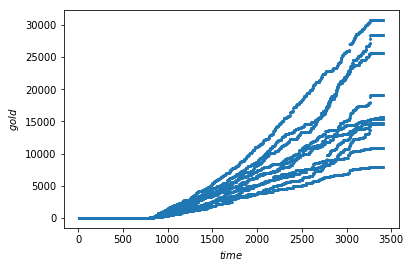

In [71]:
fig,ax = plt.subplots()
ax.scatter(interval_data.time,interval_data.gold,s=1)
ax.set_xlabel("$time$")
ax.set_ylabel("$gold$")

Из этого графика можно сделать два вывода:
* необходимо строить отдельную модель для каждого из игроков
* до определённого момента стоимость остаётся на нуле, для построения модели эти данные лучше не использовать  

Найдём время, когда стоимость персонажей начинает расти

In [31]:
interval_data.sort_values(by="time",inplace=True)

In [32]:
for i in range(interval_data.shape[0]):
    row = interval_data.iloc[i,:]
    if(row["gold"]>0):
        gold_start_grow_time = row["time"]
        break
        
print(gold_start_grow_time)

799.89294


Выберем только те данные, для которых $time>799.89294$

Text(0,0.5,'$gold$')

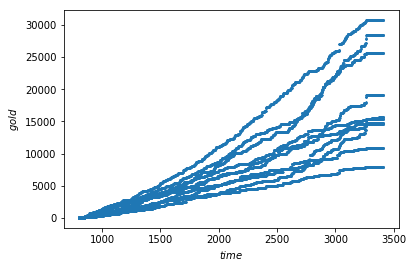

In [73]:
sign_interval_data = interval_data[interval_data.time>gold_start_grow_time]

fig,ax = plt.subplots()
ax.scatter(sign_interval_data.time,sign_interval_data.gold,s=1)
ax.set_xlabel("$time$")
ax.set_ylabel("$gold$")

In [34]:
groupby_slot_data = sign_interval_data.groupby(by="slot")

In [77]:
def plot_model_and_data(user_gold_time,lin_model,title,ax=None,xlabel="",ylabel=""):
    time = np.linspace(gold_start_grow_time,3500,400)
    gold = lin_model.coef_[0][0]*time + lin_model.intercept_[0]
    if(ax is None):
        fig,ax = plt.subplots()
    ax.plot(time,gold)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.scatter(user_gold_time.time,user_gold_time.gold,color="green",alpha=0.1,s=0.5)

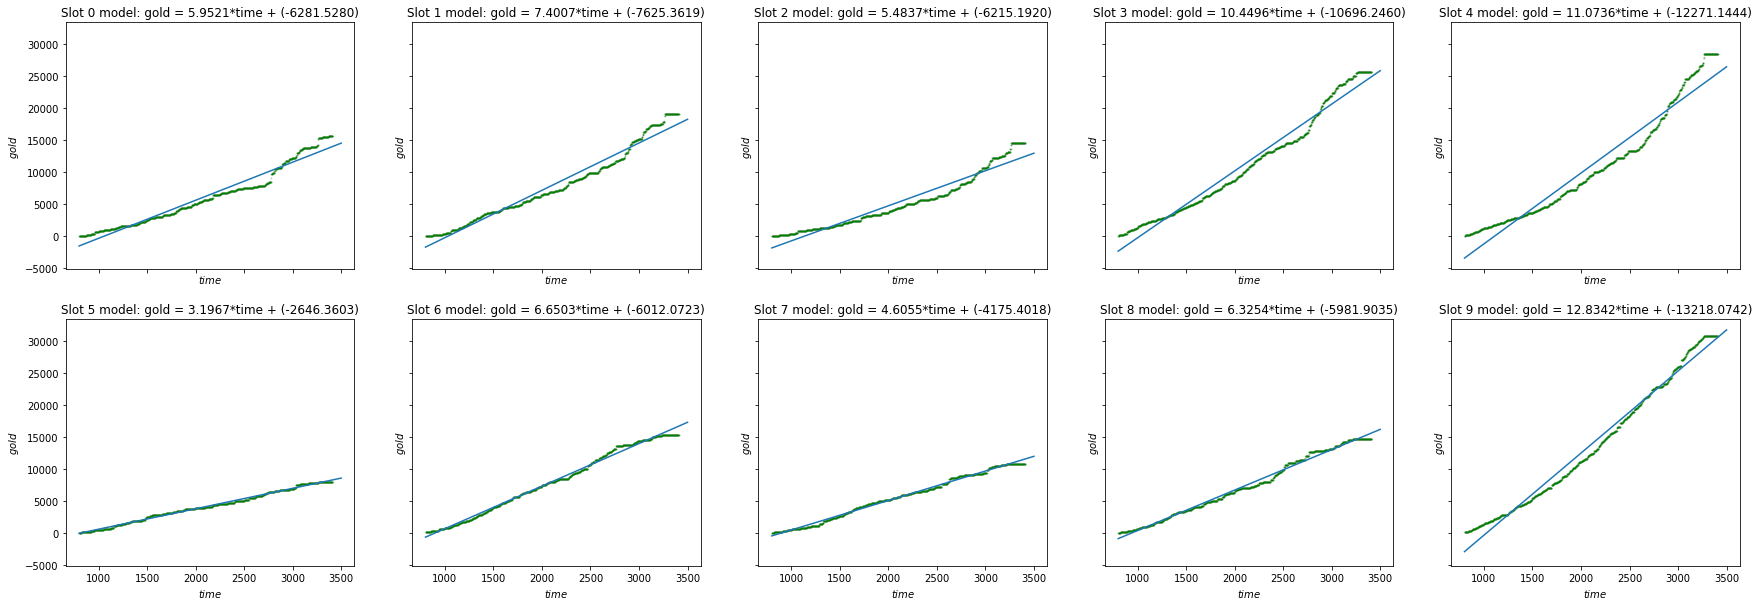

In [78]:
from sklearn.linear_model import LinearRegression

fig,axes = plt.subplots(2,5,figsize=(30,10),sharex="all",sharey="all")
axes = np.r_[axes[0],axes[1]]

for i in range(10):
    user_gold_time = groupby_slot_data.get_group(i)
    lin_model = LinearRegression()
    lin_model.fit(user_gold_time.time.as_matrix().reshape(-1,1),user_gold_time.gold.as_matrix().reshape(-1,1))
    title = "Slot {} model: gold = {:5.4f}*time + ({:5.4f})".format(i,lin_model.coef_[0][0],lin_model.intercept_[0])
    plot_model_and_data(user_gold_time,lin_model,title,ax=axes[i],xlabel="$time$",ylabel="$gold$")

### Проверка коэффициентов

Проверка на стат. значимость с уровнем значимости 0.05

Имеем модель вида $y = a + bx$

**Гипотезы**
 * a = 0
 * b = 0
 

In [37]:
alpha = 0.05

In [38]:
import statsmodels.api as sm

/home/ulad/Soft/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [97]:
def print_summary(model_result,title): 
    print("-"*30)
    print(title)
    print("Модель: gold = {time}*time + ({Intercept})".format(**model_result.params))

    print()
    if(model_result.pvalues["Intercept"]<alpha):
        print("Гипотеза a=0 отклоняется ")
    else:
        print("Нет оснований отклонить гипотезу a=0")

    if(model_result.pvalues["time"]<alpha):
        print("Гипотеза b=0 отклоняется ")
    else:
        print("Нет оснований отклонить гипотезу a=0")


    print("\nДоверительные интервалы")
    conf_int_matrix = model_result.conf_int().as_matrix()
    print("Для a ({};{})".format(*conf_int_matrix[0,:]))
    print("Для b ({};{})".format(*conf_int_matrix[1,:]))
    print("-"*30)

In [98]:
for i in range(10):
    user_gold_time = groupby_slot_data.get_group(i)
    model = sm.OLS.from_formula("gold ~ time ", data=user_gold_time)
    result = model.fit()
    print_summary(result,"Slot {}".format(i))

------------------------------
Slot 0
Модель: gold = 5.9520760330986064*time + (-6281.5280215543835)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-6360.069881468193;-6202.986161640574)
Для b (5.916957128184791;5.987194938012422)
------------------------------
------------------------------
Slot 1
Модель: gold = 7.400729467023423*time + (-7625.361887320462)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-7708.1825165752425;-7542.541258065682)
Для b (7.363697369656581;7.437761564390264)
------------------------------
------------------------------
Slot 2
Модель: gold = 5.483657296516706*time + (-6215.192011592628)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-6305.437255980445;-6124.94676720481)
Для b (5.443305385318553;5.52400920771486)
------------------------------
------------------------------
Slot 3
Модель: gold = 10.449619282796183*time + (-10696.246005716373)

Гип

#### Модель для всех игроков

------------------------------
Модель для всех игроков
Модель: gold = 7.397181765091763*time + (-7512.3284392453215)

Гипотеза a=0 отклоняется 
Гипотеза b=0 отклоняется 

Доверительные интервалы
Для a (-7609.388530164528;-7415.268348326115)
Для b (7.353782689647681;7.440580840535845)
------------------------------


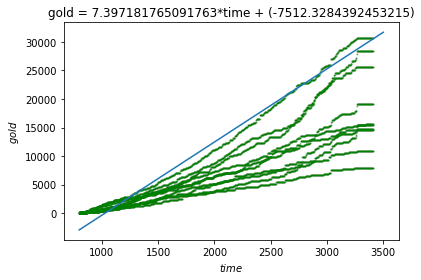

In [102]:
model = sm.OLS.from_formula("gold ~ time ", data=sign_interval_data)
result = model.fit()
print_summary(result,"Модель для всех игроков")
plot_model_and_data(sign_interval_data,lin_model,"gold = {time}*time + ({Intercept})".format(**result.params),xlabel="$time$",ylabel="$gold$")

**Выводы:** 
* Коэффициенты регрессии значимы с уровнем значимости 0.05.  

* В данной модели нужно использовать intercept, т.к. стоимость всех героев в начале игры нулевая и это начинает изменятся после определённого момента времени, чтобы модель соответствовала данным, график необходимо сдвигать на этот коэффициент.

* Коэффициент наклона является показателем, который может отражать активность игрока и значимость его персонажа в игре. Например для carry данный коэффициент должен превышать коэффициент support персонажа. Вообще говоря, этот же коэфициент может также отражать способность игрока фармить. 

* Если же строить модель для всех игроков, то данный коэффициент может показывать уровень динамики матча по сравнению с другими матчами.

# #5

В​ ​ логах​ ​ матча​ ​ имеются​ ​ события​ ​ “type”:​ ​ “DOTA_COMBATLOG_DEATH”,​ ​ которые
содержат​ ​ информацию​ ​ о ​ ​ смерти​ ​ юнитов​ ​ на​ ​ карте.​ ​ В ​ ​ случае,​ ​ когда​ ​ юнит
является​ ​ героем,​ ​ полезно​ ​ знать​ ​ время​ ​ нападения​ ​ и ​ ​ продолжительность
процесса​ ​ убийства.​ ​ Задача​ ​
заключается​ ​ в ​ ​ том,​ ​ чтобы​ ​ для​ ​ всех​ ​ убийств персонажей​ ​ на​ ​ карте​ ​ определить​ ​ те​ ​ самые​ ​ время​ ​ нападения​ ​ и
продолжительность,​ ​ а ​ ​ также​ ​ список​ ​ нападавших.​ ​ В ​ ​ этом​ ​ Вам​ ​ помогут​ ​ события
“type”:”DOTA_COMBATLOG_DAMAGE”.  

Необходимо определить как разделять нападения друг от друга.  
Пик распределения для промежутков времени между событиями DOTA_COMBATLOG_DAMAGE должнен находится возле нуля, так как в большинстве случаев, в рамках одного нападения должно генерироваться большое количество событий DOTA_COMBATLOG_DAMAGE с минимальной задержкой.  
Вычислим промежутки времени между событиями DOTA_COMBATLOG_DAMAGE для каждого героя и построим их гистограмму.

In [42]:
death_log = data[data.type=="DOTA_COMBATLOG_DEATH"]
heroes_death_log = death_log[death_log.targethero == 1.0].dropna(axis=1)
combatlog_data  = data[data.type=="DOTA_COMBATLOG_DAMAGE"].dropna(axis=1)

Text(0,0.5,'Частота')

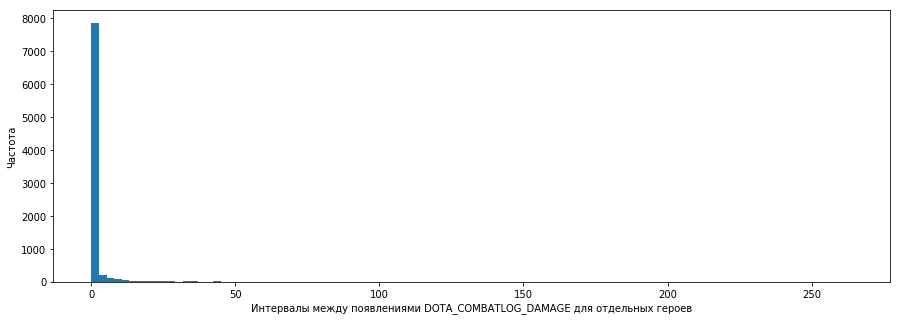

In [103]:
target_heroes_names = heroes_death_log.targetname.unique()
kill_stats = []
time_diffs = []

for hero in target_heroes_names:
    hero_combatlog = combatlog_data[combatlog_data.targetname==hero]
    combat_time = hero_combatlog.time.as_matrix()
    for j in range(len(combat_time)-1):
        time_diffs.append(combat_time[j+1] - combat_time[j])
            
time_diffs = pd.Series(time_diffs)
ax = time_diffs.plot.hist(bins=100,figsize=(15,5))
ax.set_xlabel("Интервалы между появлениями DOTA_COMBATLOG_DAMAGE для отдельных героев")
ax.set_ylabel("Частота")

Возле 0 находится пик распределения, что согласуется с тем, что между событиями DOTA_COMBATLOG_DAMAGE должна быть минимальна.

In [44]:
time_diffs.describe()

count    8679.000000
mean        2.765654
std        13.017601
min         0.000000
25%         0.100300
50%         0.334400
75%         0.903100
max       264.135500
dtype: float64

Построим график роста значений квантилей

Text(0,0.5,'Интервалы между появлениями DOTA_COMBATLOG_DAMAGE для отдельных героев')

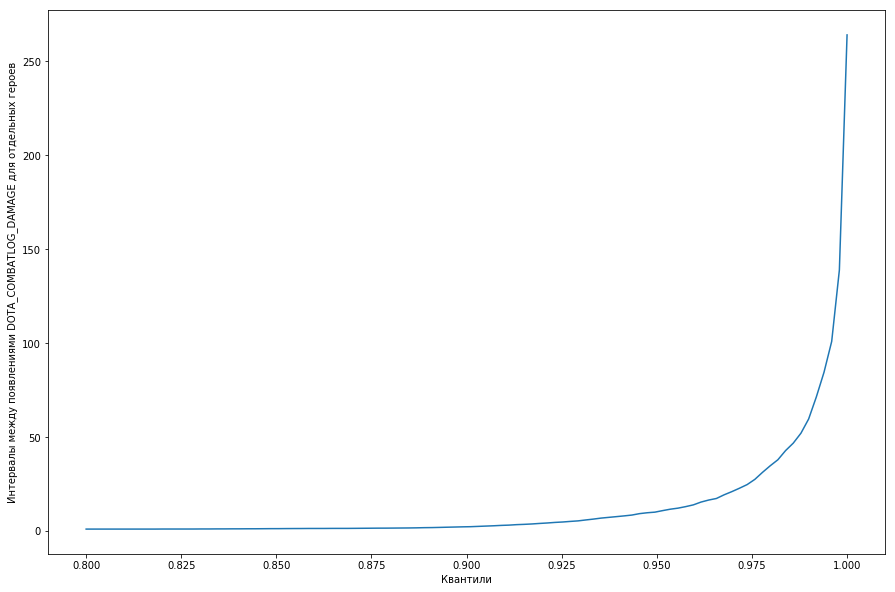

In [94]:
q_levels = np.linspace(0.8,1,num=100)
quantiles_values = []
for q in q_levels:
    quantiles_values.append(time_diffs.quantile(q=q))

fig,ax = plt.subplots(figsize=(15,10))
ax.plot(q_levels,quantiles_values)
ax.set_xlabel("Квантили")
ax.set_ylabel("Интервалы между появлениями DOTA_COMBATLOG_DAMAGE для отдельных героев")

По графику видно, что значения квантилей резко возрастают после квантиля 0.925 

In [46]:
time_diffs.quantile(q=0.925)

4.73719500000014

**Будем считать, что персонаж не находится в бою, если не получает урона от героев в течении 5 секунд**  

In [47]:
DELAY = 5

In [49]:
def find_start_killing_time(combat_time,delay):
    start_killing_time = combat_time[0]
    if last_hero_death_time - combat_time[-1]>delay:
        start_killing_time = last_hero_death_time
    else:
        for i in range(len(combat_time)-1,-1,-1):
            if combat_time[i] - combat_time[i-1] > DELAY:
                start_killing_time = combat_time[i]
                break
    return start_killing_time

In [50]:
target_heroes_names = heroes_death_log.targetname.unique()
kill_stats = []

for hero in target_heroes_names:
    hero_combatlog = combatlog_data[combatlog_data.targetname==hero]
    hero_death_log = heroes_death_log[heroes_death_log.targetname==hero]
    
    for i in range(hero_death_log.shape[0]):
        killer = hero_death_log.iloc[i,:]["attackername"]
        last_hero_death_time = hero_death_log.iloc[i,:]["time"]
        
        if(i==0):
            prev_hero_death_time = 0
        else:
            prev_hero_death_time = hero_death_log.iloc[i-1,:]["time"]
            
        live_combat_events_log = hero_combatlog[(hero_combatlog.time > prev_hero_death_time) & \
                                                (hero_combatlog.time < last_hero_death_time)]

        combat_time = live_combat_events_log.time.as_matrix()
        start_killing_time = find_start_killing_time(combat_time,DELAY)
        
        killing_combats = live_combat_events_log[live_combat_events_log.time>=start_killing_time]
        kill_participants = list(killing_combats[killing_combats.attackerhero==1.0].attackername.unique())

        if not (killer in kill_participants):
            kill_participants.append(killer)

        result = {"kill_participants":kill_participants,
                  "targethero":hero,
                  "start_time":start_killing_time,
                  "end_time":last_hero_death_time}
        
        kill_stats.append(result)

In [51]:
import json
with open("kills.json","w") as file:
    file.write(json.dumps(kill_stats))